In [2]:
# 1. Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [3]:
# Load dataset
df = pd.read_csv(r"F:\land\tamilnadu_land_price_dataset.csv")

# Encode categorical variables
le_location = LabelEncoder()
le_highway = LabelEncoder()
df['Location_encoded'] = le_location.fit_transform(df['Location'])
df['Near_Highway_encoded'] = le_highway.fit_transform(df['Near_Highway'])

# Drop missing values
df.dropna(inplace=True)

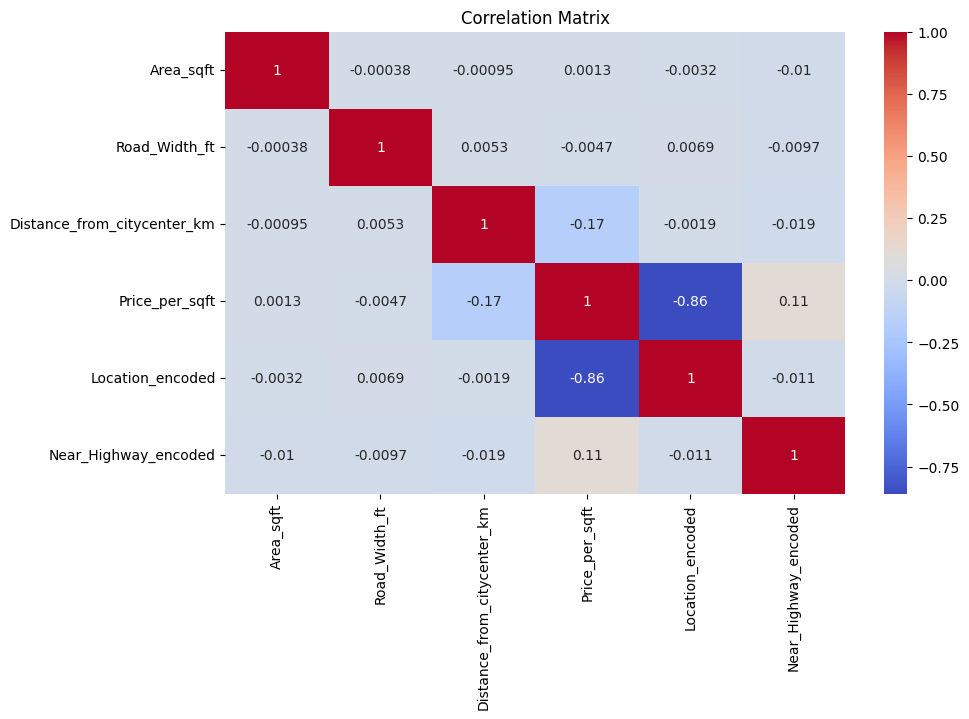

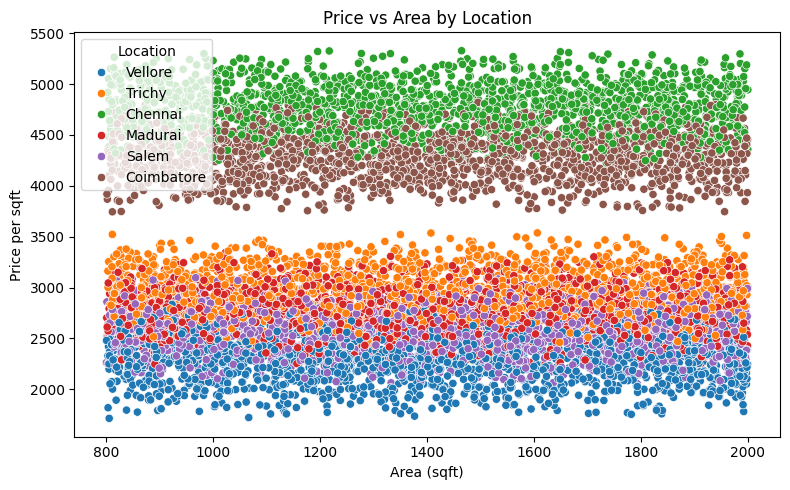

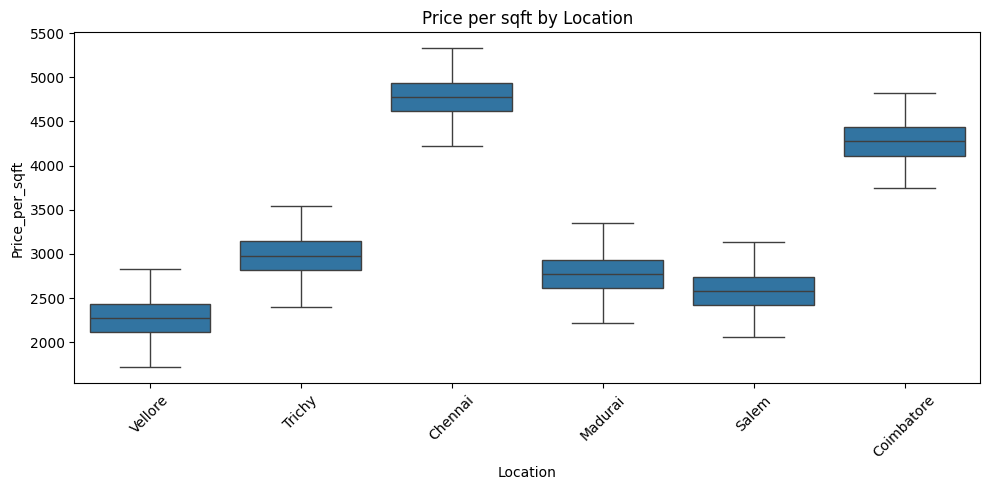

In [9]:
# 2. EDA (Exploratory Data Analysis)

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Price vs Area plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Area_sqft', y='Price_per_sqft', hue='Location', data=df)
plt.title("Price vs Area by Location")
plt.xlabel("Area (sqft)")
plt.ylabel("Price per sqft")
plt.tight_layout()
plt.savefig("price_vs_area_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Location vs Price boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Location', y='Price_per_sqft', data=df)
plt.title("Price per sqft by Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("location_vs_price_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:

# Identify and remove outliers using IQR
Q1 = df["Price_per_sqft"].quantile(0.25)
Q3 = df["Price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Price_per_sqft"] >= Q1 - 1.5 * IQR) & (df["Price_per_sqft"] <= Q3 + 1.5 * IQR)]


In [6]:
# 3. Model Building

# Define features and target
X = df[["Area_sqft", "Road_Width_ft", "Distance_from_citycenter_km", "Location_encoded", "Near_Highway_encoded"]]
y = np.log1p(df["Price_per_sqft"])  # log transform for better linearity

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and reverse log transformation
y_pred_log = model.predict(X_test)
y_test_orig = np.expm1(y_test)
y_pred_orig = np.expm1(y_pred_log)


📊 Model Evaluation Metrics
Mean Absolute Error (MAE): 368.51
Mean Squared Error (MSE): 174409.82
R² Score: 0.8010


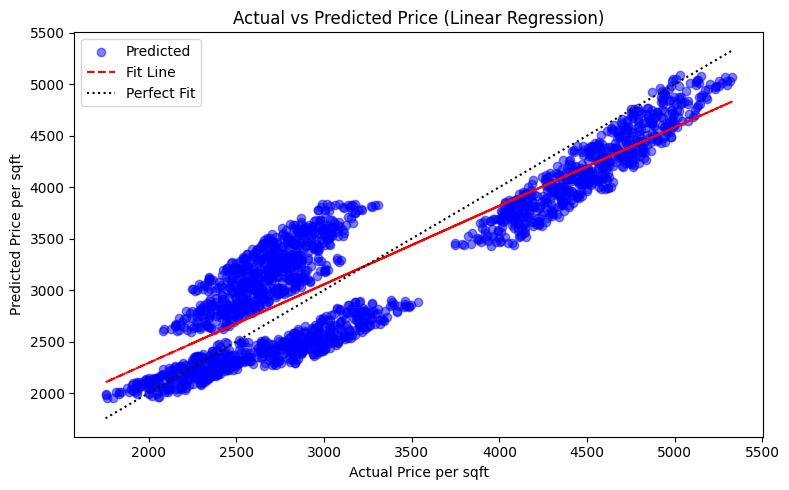

In [ ]:
# 4. Evaluation

# Metrics
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mse = mean_squared_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("📊 Model Evaluation Metrics")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Actual vs Predicted Plot with Fit Line
plt.figure(figsize=(8, 5))
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5, color='blue', label="Predicted")
z = np.polyfit(y_test_orig, y_pred_orig, 1)
p = np.poly1d(z)
plt.plot(y_test_orig, p(y_test_orig), "r--", label="Fit Line")
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'k:', label="Perfect Fit")
plt.xlabel("Actual Price per sqft")
plt.ylabel("Predicted Price per sqft")
plt.title("Actual vs Predicted Price (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.savefig("Actual vs Predicted Plot with Fit Line.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# 5. Save Model using Pickle

# Save model
with open("land_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
